参考链接：https://zhuanlan.zhihu.com/p/162001079

**导入基础包**

In [8]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [9]:
df = pd.read_csv('data_features_Phylums.csv') 

In [10]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Proteobacteria,Bacteroidota,...,Actinobacteriota,Acidobacteriota,Desulfobacterota,Dependentiae,Cyanobacteria,Spirochaetota,Nanoarchaeota,Elusimicrobiota,SAR324 clade(Marine group B),Armatimonadota
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,40.320312,29.988281,...,0.308594,3.945312,0.320312,0.175781,0.156250,0.160156,0.023438,0.652344,1.351562,0.738281
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,37.351562,31.402344,...,0.417969,4.082031,0.347656,0.191406,0.117188,0.187500,0.000000,0.554688,1.605469,1.031250
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,35.941406,33.183594,...,0.484375,4.027344,0.292969,0.222656,0.121094,0.175781,0.011719,0.578125,1.593750,0.828125
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,39.359375,30.535156,...,0.394531,4.113281,0.363281,0.207031,0.109375,0.191406,0.027344,0.671875,1.234375,0.875000
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,35.074219,33.347656,...,0.363281,4.449219,0.269531,0.253906,0.117188,0.250000,0.015625,0.628906,1.546875,0.882812


In [11]:
df.shape

(1186, 29)

In [12]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Proteobacteria', 'Bacteroidota',
       'Patescibacteria', 'Unclassified', 'Firmicutes', 'Planctomycetota',
       'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota', 'Others',
       'Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota',
       'Desulfobacterota', 'Dependentiae', 'Cyanobacteria', 'Spirochaetota',
       'Nanoarchaeota', 'Elusimicrobiota', 'SAR324 clade(Marine group B)',
       'Armatimonadota'],
      dtype='object')

In [13]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = ['Proteobacteria', 'Bacteroidota',
       'Patescibacteria', 'Unclassified', 'Firmicutes', 'Planctomycetota',
       'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota', 'Others',
       'Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota',
       'Desulfobacterota', 'Dependentiae', 'Cyanobacteria', 'Spirochaetota',
       'Nanoarchaeota', 'Elusimicrobiota', 'SAR324 clade(Marine group B)',
       'Armatimonadota']

**简单的EDA**

In [14]:
df.isnull().sum()

Unnamed: 0                        0
Sample ID                         0
Sampling month average          132
Sampling month                   23
SRTd                            342
COD                             577
NH4N                            430
TP                              583
Proteobacteria                    0
Bacteroidota                      0
Patescibacteria                   0
Unclassified                      0
Firmicutes                        0
Planctomycetota                   0
Verrucomicrobiota                 0
Chloroflexi                       0
Myxococcota                       0
Others                            0
Bdellovibrionota                  0
Actinobacteriota                  0
Acidobacteriota                   0
Desulfobacterota                  0
Dependentiae                      0
Cyanobacteria                     0
Spirochaetota                     0
Nanoarchaeota                     0
Elusimicrobiota                   0
SAR324 clade(Marine group B)

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [17]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [18]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [19]:
df.isnull().sum()

Unnamed: 0                      0
Sample ID                       0
Sampling month average          0
Sampling month                  0
SRTd                            0
COD                             0
NH4N                            0
TP                              0
Proteobacteria                  0
Bacteroidota                    0
Patescibacteria                 0
Unclassified                    0
Firmicutes                      0
Planctomycetota                 0
Verrucomicrobiota               0
Chloroflexi                     0
Myxococcota                     0
Others                          0
Bdellovibrionota                0
Actinobacteriota                0
Acidobacteriota                 0
Desulfobacterota                0
Dependentiae                    0
Cyanobacteria                   0
Spirochaetota                   0
Nanoarchaeota                   0
Elusimicrobiota                 0
SAR324 clade(Marine group B)    0
Armatimonadota                  0
dtype: int64

重定义训练和测试集

In [20]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**建模**

In [21]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型
from sklearn.linear_model import SGDRegressor
# XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor

In [22]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [23]:
xgb =  XGBRegressor(verbosity = 0, silent=True, random_state=42)

In [24]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb)
])

训练模型

In [25]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8316


利用训练好的模型做测试

In [26]:
y_preds = model.predict(X_test)

In [27]:
y_preds

array([[34.61594   , 31.702354  ,  1.248598  , ...,  0.22575657,
         0.20392244,  0.22078541],
       [36.150314  , 30.648525  ,  2.0807254 , ...,  0.26850778,
         0.2037881 ,  0.22368705],
       [36.150314  , 30.648525  ,  2.0807254 , ...,  0.26850778,
         0.2037881 ,  0.22368705],
       ...,
       [37.064285  , 30.468267  ,  1.1322193 , ...,  0.23903449,
         0.08992113,  0.07880441],
       [37.064285  , 30.468267  ,  1.1322193 , ...,  0.23903449,
         0.08992113,  0.07880441],
       [37.064285  , 30.468267  ,  1.1322193 , ...,  0.23903449,
         0.08992113,  0.07880441]], dtype=float32)

**结果可视化**

展示第一个ID的预测结果。

In [28]:
y_preds[0]

array([3.4615940e+01, 3.1702354e+01, 1.2485980e+00, 7.9443681e-01,
       8.6344987e-01, 2.9767466e+00, 1.4437932e+00, 3.5810890e+00,
       7.6549945e+00, 3.5613427e+00, 7.7448040e-01, 5.4039302e+00,
       2.7870872e+00, 2.2039554e-01, 1.9645073e-01, 2.8641555e-01,
       1.2941010e+00, 1.5490610e-02, 2.2575657e-01, 2.0392244e-01,
       2.2078541e-01], dtype=float32)

In [29]:
y_test.iloc[0].tolist()

[36.31640625,
 19.61328125,
 2.0703125,
 0.828125,
 0.70703125,
 3.0,
 2.27734375,
 5.046875,
 12.75,
 3.1875,
 1.03125,
 7.765625,
 3.203125,
 0.43359375,
 0.0625,
 0.21484375,
 0.37109375,
 0.04296875,
 0.37109375,
 0.3984375,
 0.30859375]

In [30]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [31]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Proteobacteria,34.615940,36.316406
Bacteroidota,31.702354,19.613281
Patescibacteria,1.248598,2.070312
Unclassified,0.794437,0.828125
Firmicutes,0.863450,0.707031
Planctomycetota,2.976747,3.000000
Verrucomicrobiota,1.443793,2.277344
Chloroflexi,3.581089,5.046875
Myxococcota,7.654994,12.750000


预测和实际结果的柱状图对比

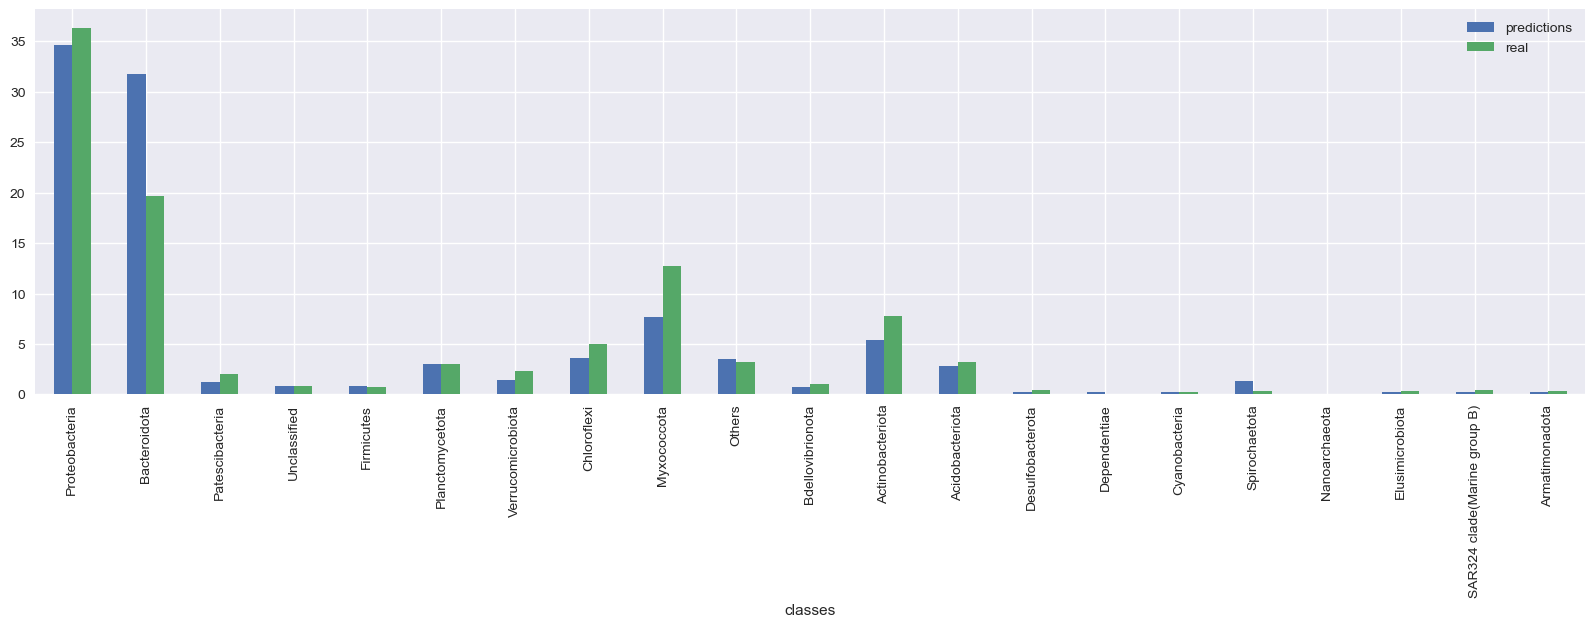

In [32]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

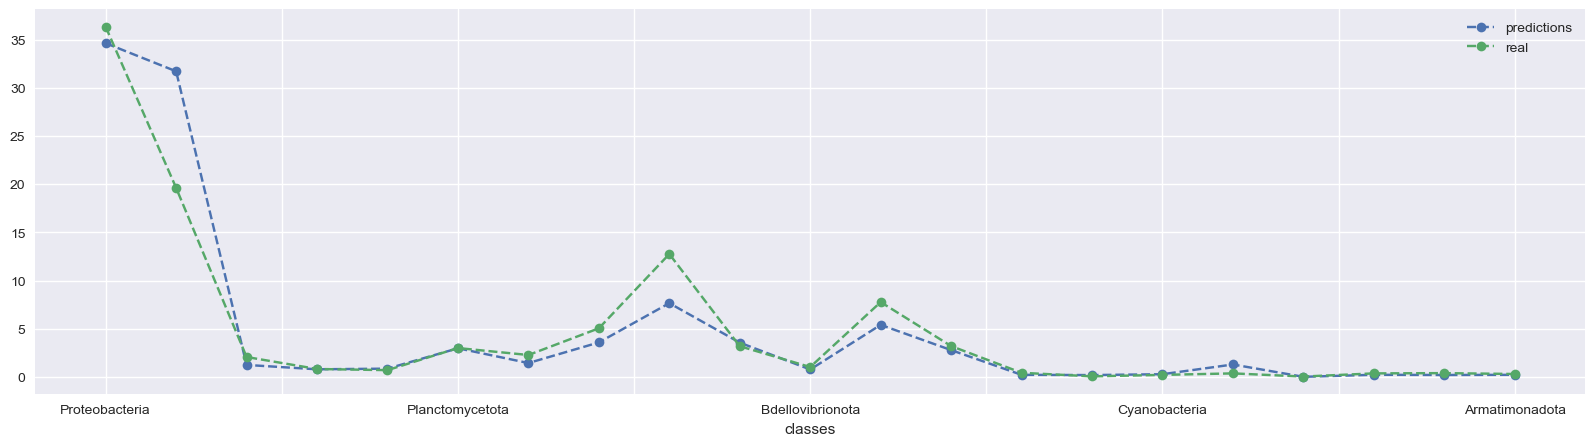

In [33]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [34]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8316


In [35]:
from sklearn import metrics

训练集的MSE

In [36]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

1.772370020511416

测试集部分

In [37]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

16.926578899078418

In [38]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

4.114192375069306

In [39]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

1.9160019717510546

In [40]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

33304277257492.535

# 调参和优化

In [41]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [42]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [43]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=42, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylev

In [44]:
# Perform Gridsearch and fit
param_grid = {"regressor__n_estimators": [100,150,300,400,500]}

In [45]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     featu...
                                                     learning

In [46]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, 

In [47]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.8316


R方差别不大

In [48]:
y_preds1 = gs.predict(X_test)

In [49]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

16.926578899078418

MSE的差别也不大

In [50]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

1.772370020511416

训练集和测试集的MSE差别比较大